In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import nltk # type: ignore
from nltk.sentiment.vader import SentimentIntensityAnalyzer # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns  

# Tải bộ từ điển VADER cho phân tích cảm xúc
nltk.download('vader_lexicon')

# Khởi tạo VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Thiết lập kiểu hiển thị cho biểu đồ
plt.style.use('ggplot')  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Đọc file CSV từ đường dẫn
file_path = r'D:/ki3nam4/KhoaHocDuLieu/baitaplon/1429_1.csv'

try:
    df = pd.read_csv(file_path)
    # Hiển thị 5 dòng đầu tiên của dữ liệu
    print("5 dòng đầu tiên của dữ liệu:")
    display(df.head())

    # Hiển thị các cột trong dữ liệu
    print("\nCác cột trong dữ liệu:")
    print(df.columns)

    # Kiểm tra thông tin tổng quan của dữ liệu
    print("\nThông tin dữ liệu:")
    print(df.info())
except FileNotFoundError:
    print(f"Không tìm thấy file tại đường dẫn: {file_path}. Vui lòng kiểm tra lại đường dẫn.")



5 dòng đầu tiên của dữ liệu:


C:\Users\User\AppData\Local\Temp\ipykernel_14660\2088954178.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42



Các cột trong dữ liệu:
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          3

In [7]:
# Hàm phân tích cảm xúc
def analyze_sentiment(text):
    if isinstance(text, str):  # Kiểm tra xem text có phải là chuỗi không
        scores = sia.polarity_scores(text)
        compound = scores['compound']
        if compound >= 0.05:
            return 'Tích cực'
        elif compound <= -0.05:
            return 'Tiêu cực'
        else:
            return 'Trung tính'
    else:
        return 'Trung tính'  # Nếu không có text, mặc định là trung tính

# Áp dụng phân tích cảm xúc lên cột reviews.text
df['sentiment'] = df['reviews.text'].apply(analyze_sentiment)

# Hiển thị số lượng comment theo từng loại cảm xúc
print("\nPhân bố cảm xúc:")
print(df['sentiment'].value_counts())


Phân bố cảm xúc:
sentiment
Tích cực      31029
Tiêu cực       2087
Trung tính     1544
Name: count, dtype: int64


In [8]:
# Nhóm dữ liệu theo tên sản phẩm và cảm xúc
sentiment_counts = df.groupby(['name', 'sentiment']).size().unstack(fill_value=0)

# Chỉ lấy các cột Tích cực và Tiêu cực
sentiment_counts = sentiment_counts[['Tích cực', 'Tiêu cực']]

# Hiển thị dữ liệu đã nhóm
print("\nSố lượng comment tích cực/tiêu cực theo sản phẩm:")
display(sentiment_counts.head())


Số lượng comment tích cực/tiêu cực theo sản phẩm:


sentiment,Tích cực,Tiêu cực
name,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",2528,163
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",141,10
"All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers,,",125,19
"Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,",292,11
"Amazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,\r\nAmazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,",4,0


) missing from font(s) DejaVu Sans.ykernel_14220\3191596507.py:12: UserWarning: Glyph 13 (
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_14220\3191596507.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
) missing from font(s) DejaVu Sans.site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


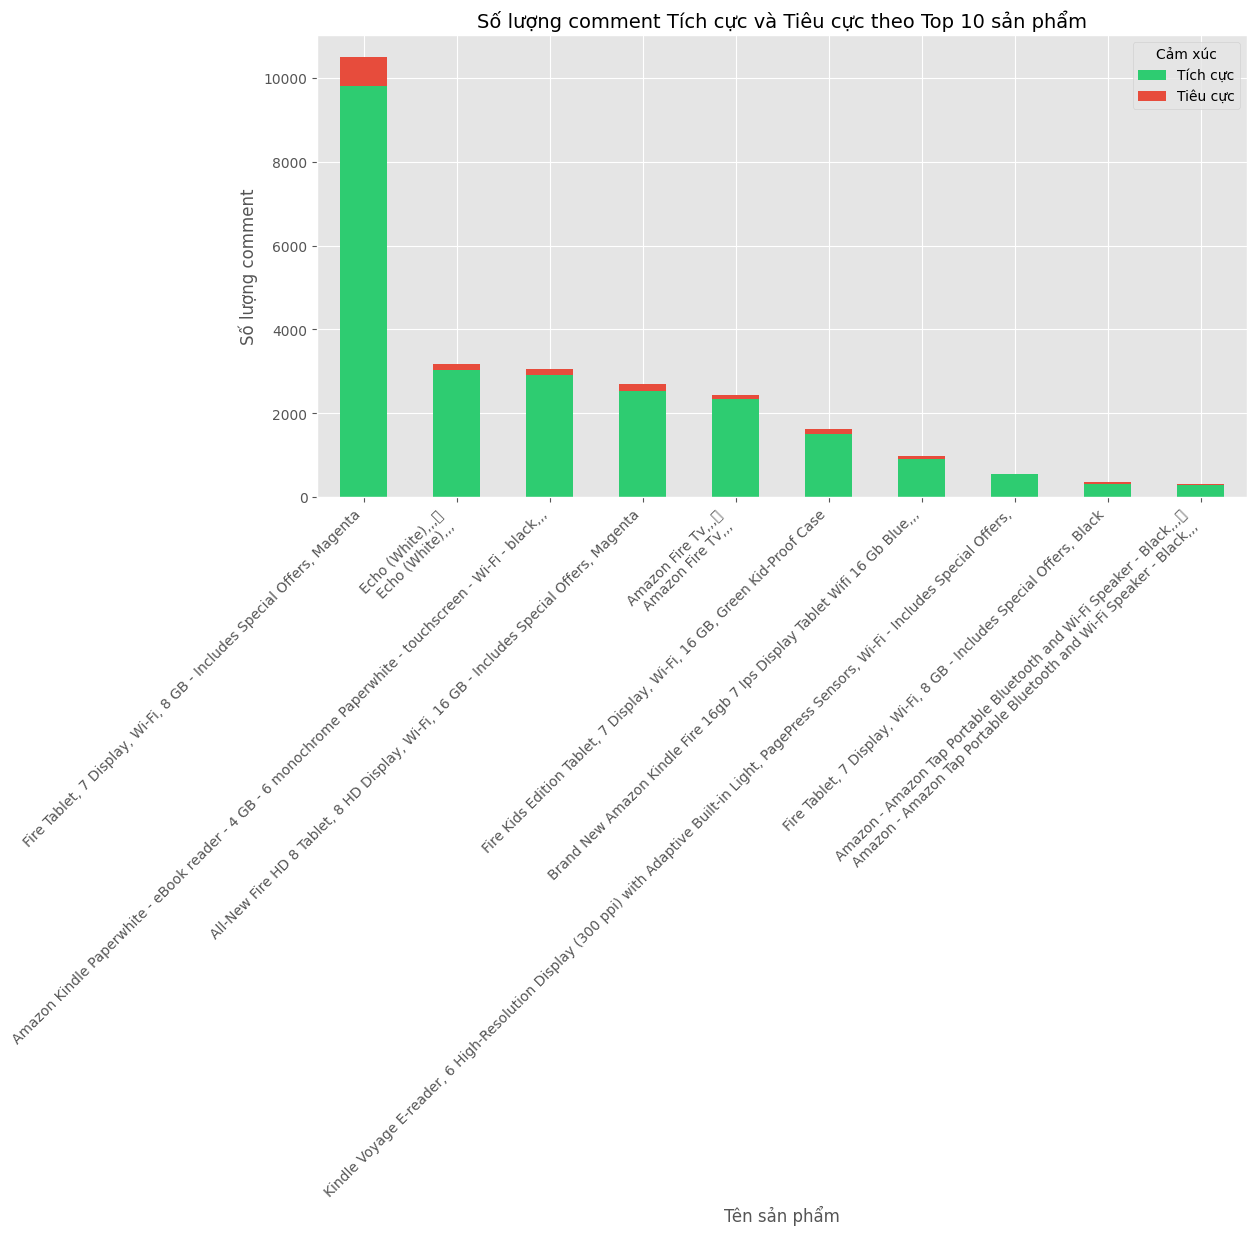

In [9]:
# Chọn top 10 sản phẩm có nhiều comment nhất
top_products = sentiment_counts.sum(axis=1).nlargest(10).index
top_sentiment_counts = sentiment_counts.loc[top_products]

# Vẽ biểu đồ cột
top_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#2ecc71', '#e74c3c'])
plt.title('Số lượng comment Tích cực và Tiêu cực theo Top 10 sản phẩm', fontsize=14)
plt.xlabel('Tên sản phẩm', fontsize=12)
plt.ylabel('Số lượng comment', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cảm xúc')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()